# Prodigy Infotech

Author: Aarti Wani

Data Science Intern

Task-02

Task: Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.


In [ ]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading in-built titanic dataset
df=sns.load_dataset('titanic')

# Data Understanding

In [ ]:
# Checking first 5 records
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Checking last 5 records
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [ ]:
# Checking dimensions of the dataset
df.shape

(891, 15)

In [ ]:
# Checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# Checking 5 variable summary
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Checking unique values
df.nunique()

survived         2
pclass           3
sex              2
age             89
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

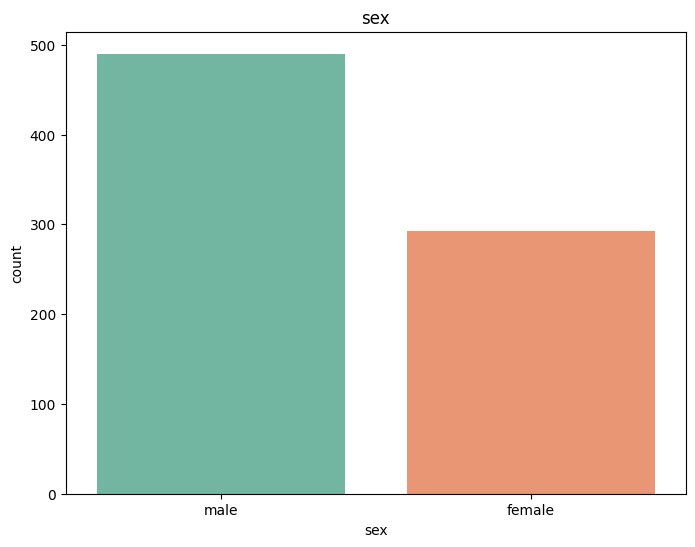

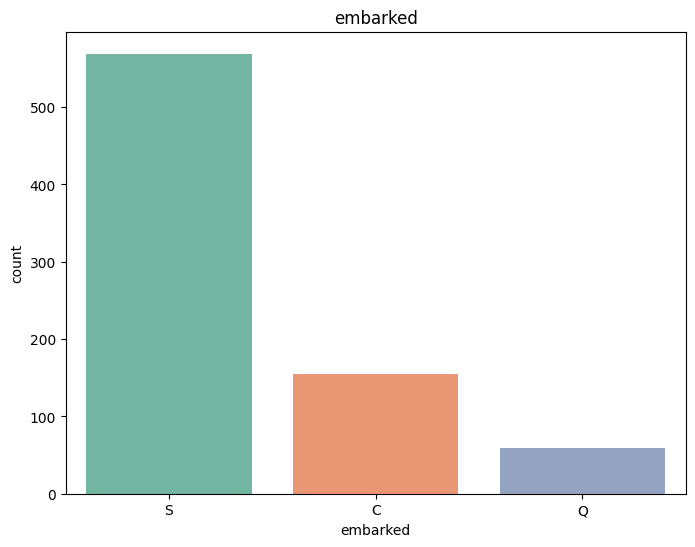

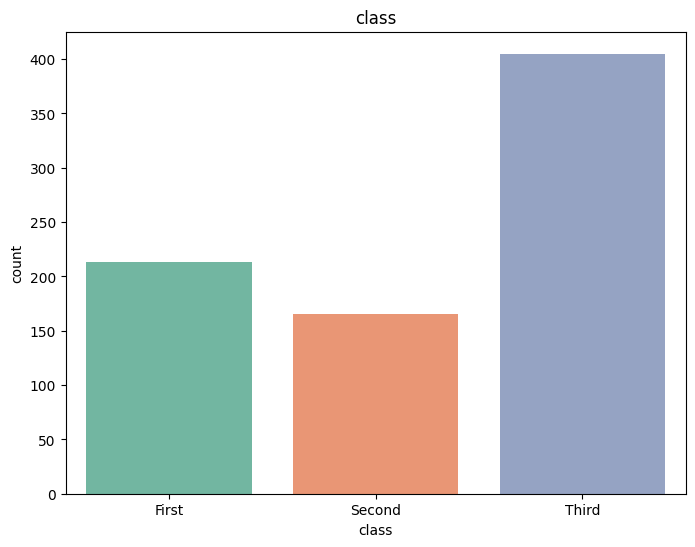

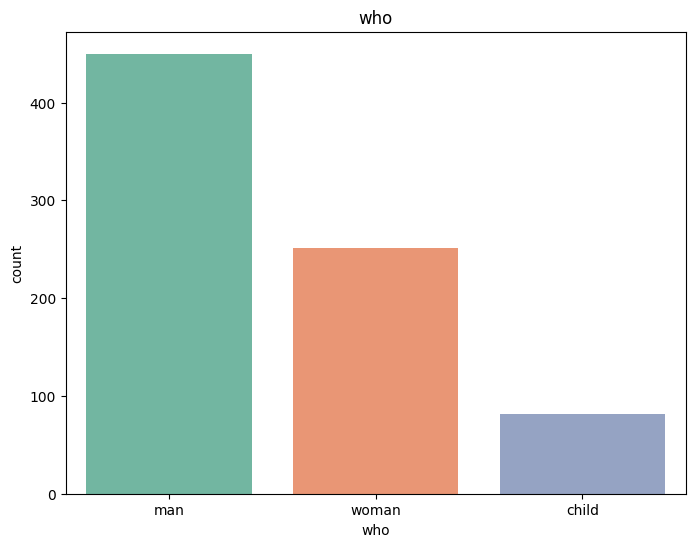

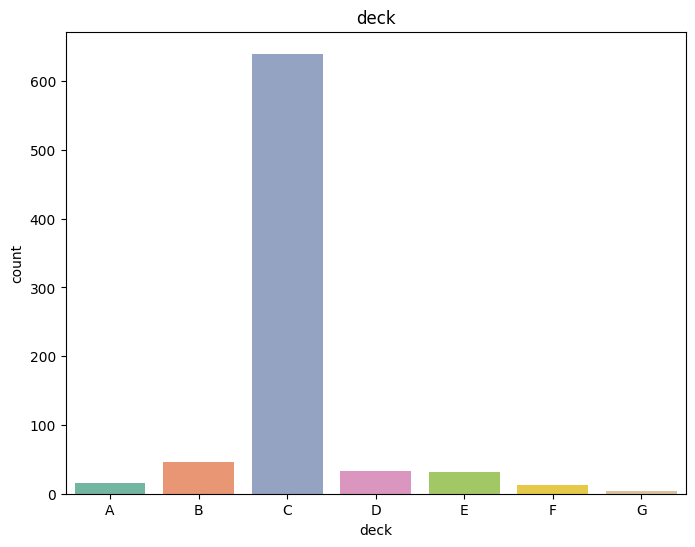

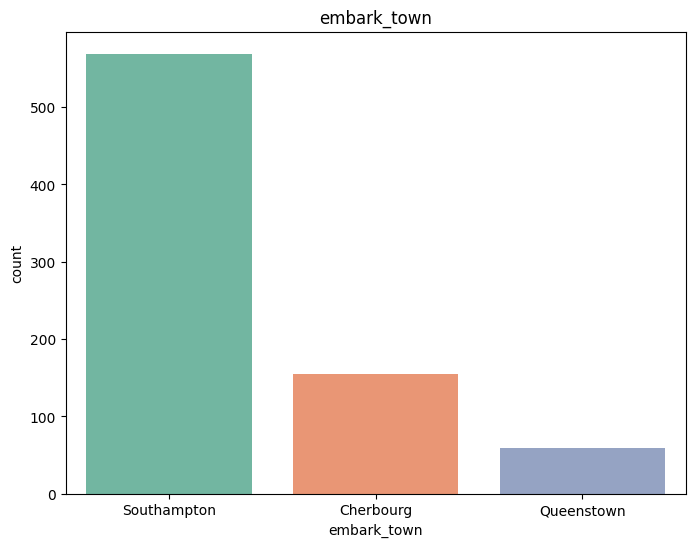

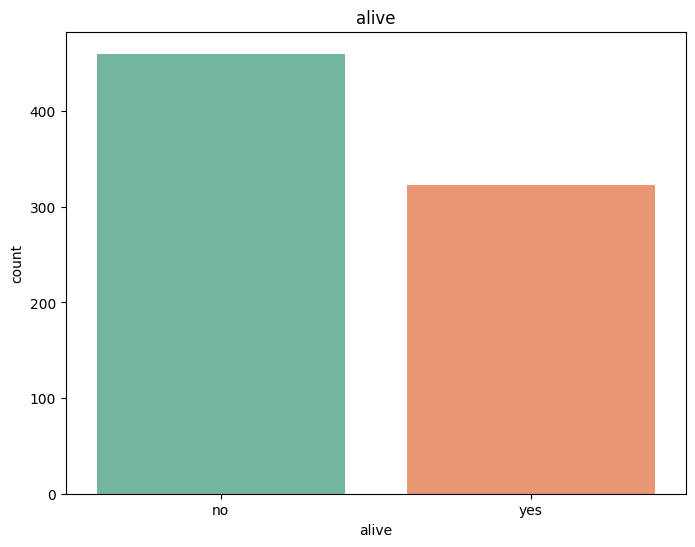

In [ ]:
#visualizing the distribution of categorical variable
for column in categorical_features:
  plt.figure(figsize=(8,6))
  sns.countplot(x=column,palette='Set2',data=df)
  plt.title(column)
  plt.show()

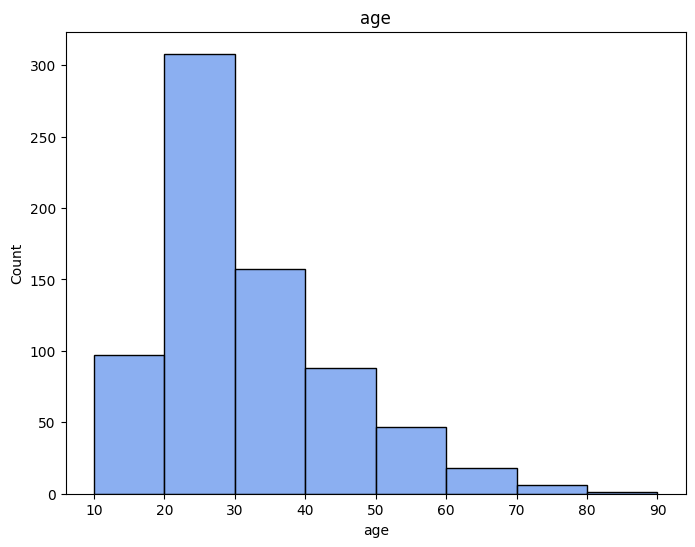

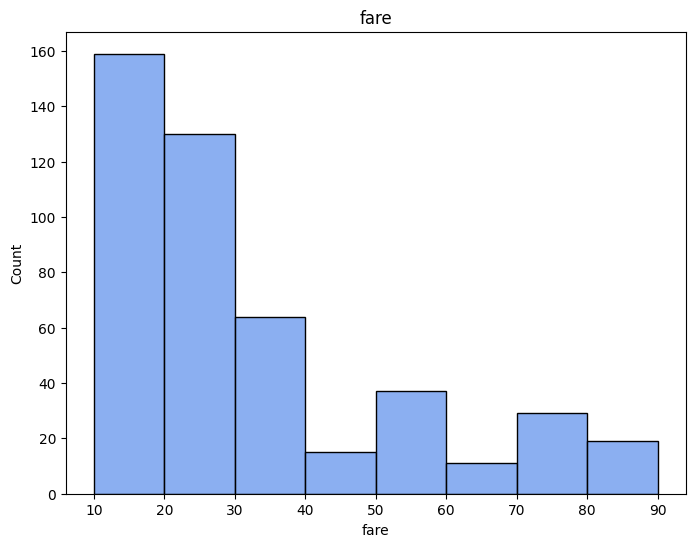

In [ ]:
#visualizing the distribution of continuous variable
bins=[10,20,30,40,50,60,70,80,90]
for column in continuos_features:
  plt.figure(figsize=(8,6))
  sns.histplot(x=column,bins=bins,data=df,color='cornflowerblue')
  plt.title(column)
  plt.show()

# Data Cleaning

In [ ]:
# Checking missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# Imputing missing values of categorical features
categorical_features=df.select_dtypes(include=('object','category'))
for column in categorical_features:
  df[column]=df[column].fillna(df[column].mode()[0])

In [ ]:
# Imputing missing values of continuous features
continuos_features=df.select_dtypes(include='float64')
for column in continuos_features:
  df[column]=df[column].fillna(df[column].mean())

In [ ]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
# Checking duplicated values
df.duplicated().sum()

108

In [ ]:
# Removing duplicated values
df=df.drop_duplicates()
df.duplicated().sum()

0

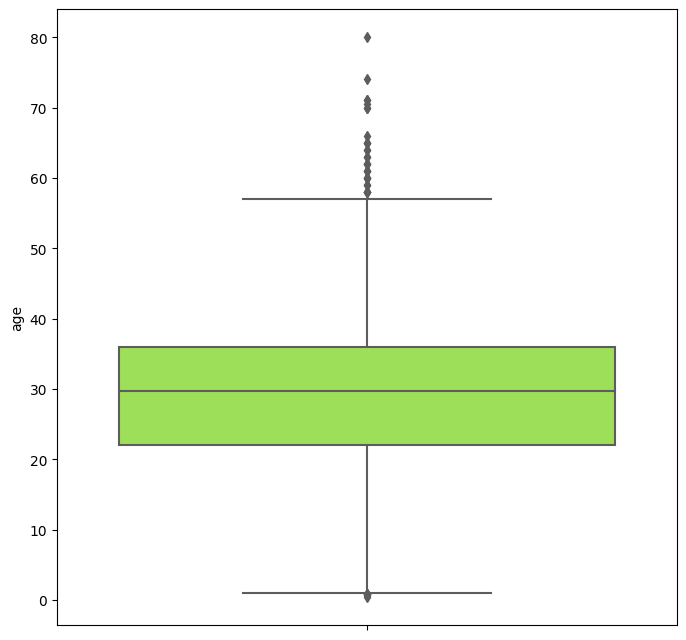

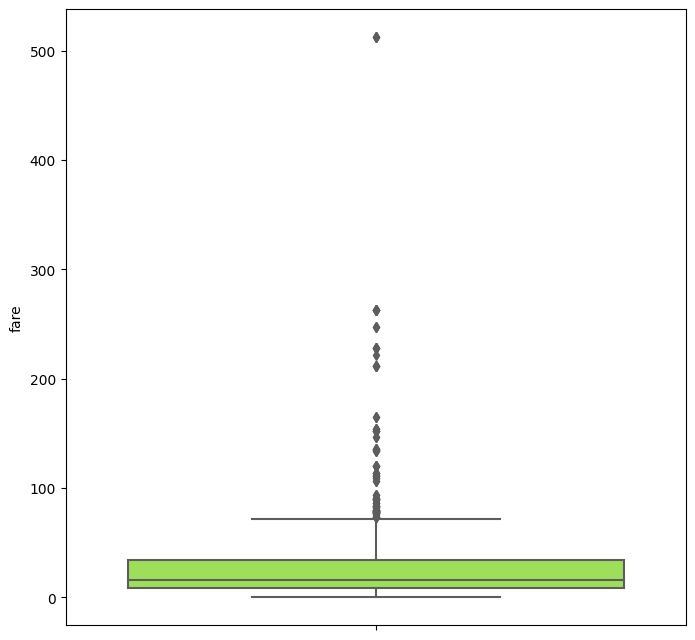

In [ ]:
# outlier detection and removal
for column in continuos_features:
  plt.figure(figsize=(8,8))
  sns.boxplot(y=df[column],data=df,color='#9ef542')
  plt.show()

# outliers are present in both age & fare column

In [ ]:
for column in continuos_features:
  q1=df[column].quantile(0.25)
  q3=df[column].quantile(0.75)
  IQR=q3-q1
  l_limit=q1-(IQR*1.5)
  u_limit=q3+(IQR*1.5)
  df.loc[df[column]<l_limit,column]=l_limit
  df.loc[df[column]>u_limit,column]=u_limit

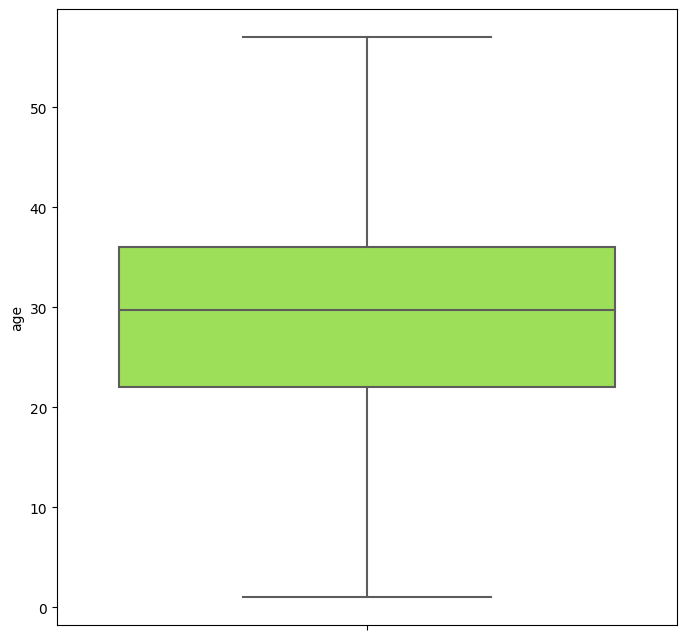

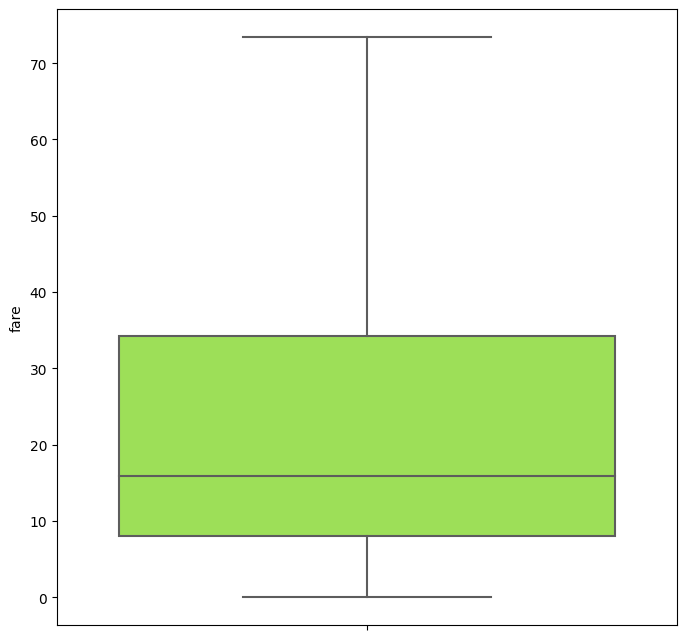

In [ ]:
for column in continuos_features:
  plt.figure(figsize=(8,8))
  sns.boxplot(y=df[column],color='#9ef542',data=df)
  plt.show()



#  Relationship Analysis




Text(0.5, 1.0, 'No. of people survived')

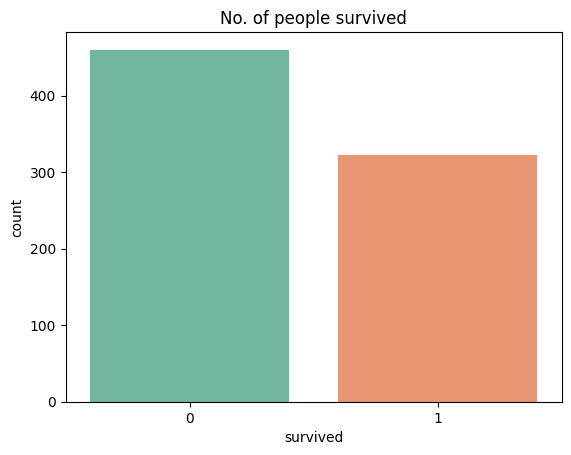

In [ ]:
# Checking how many people were survived
# 1 means 'Yes' 0 means 'No'
sns.countplot(x=df['survived'],palette='Set2')
plt.title('No. of people survived')
# from graph it is clear that count of people survived is less.

<Axes: xlabel='sex', ylabel='count'>

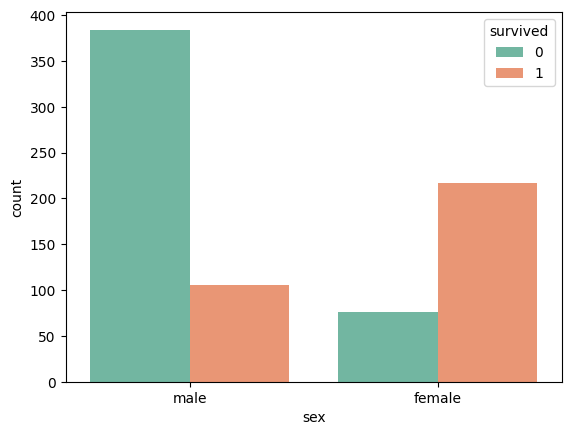

In [ ]:
sns.countplot(x=df['sex'],hue=df['survived'],palette='Set2')

<Axes: xlabel='sex', ylabel='survived'>

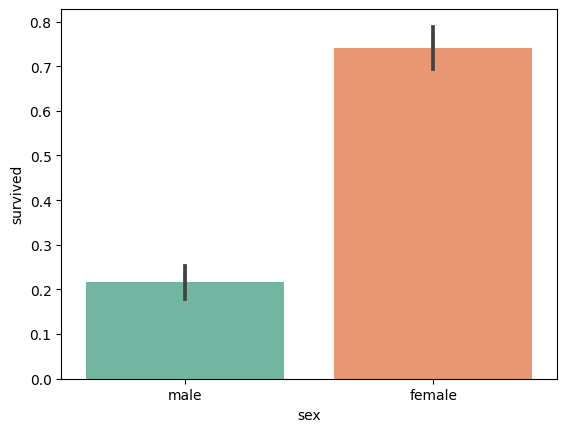

In [ ]:
sns.barplot(x='sex',y='survived',palette='Set2',data=df)

In [ ]:
pd.crosstab(df['sex'],df['survived'])
# it shows that 233 female were survived and 109 male were survived. the survival rate is more for female than male

survived,0,1
sex,,
female,76,217
male,384,106


Text(0.5, 1.0, 'Embarked Vs Survival')

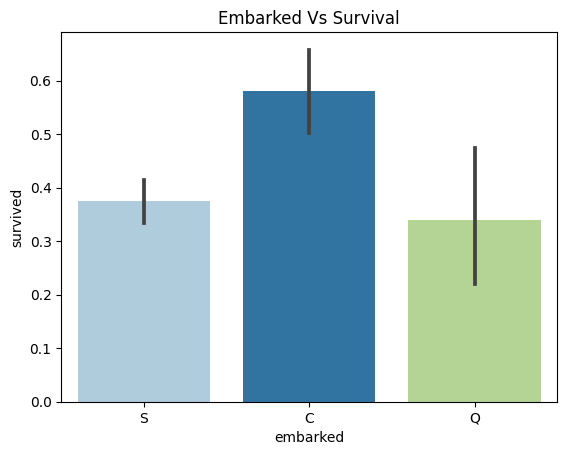

In [ ]:
sns.barplot(x='embarked',y='survived',palette='Paired',data=df)
plt.title('Embarked Vs Survival')
# people who embarked at cherbourg have more chances of survival

Text(0.5, 1.0, 'pclass: survived vs dead')

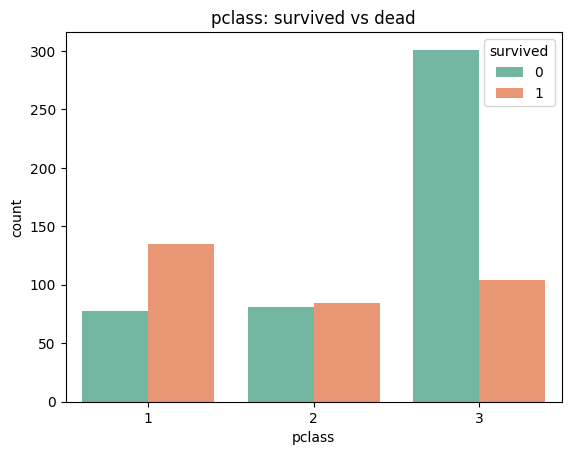

In [ ]:
sns.countplot(x='pclass',hue='survived',data=df,palette='Set2')
plt.title('pclass: survived vs dead')
# it is clear that survival rate is higher for class 1 passenger.

Text(0.5, 1.0, 'Pclass Vs Survived')

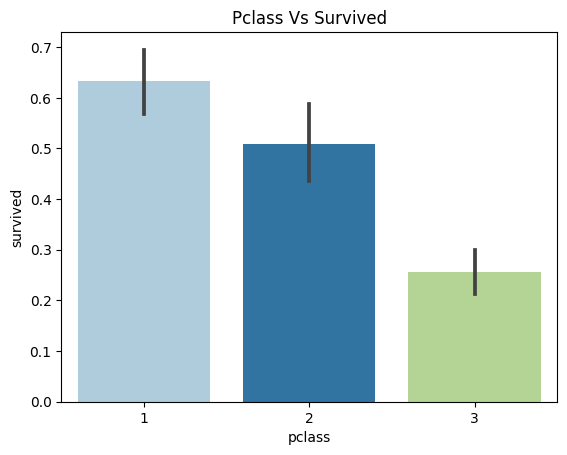

In [ ]:
sns.barplot(x='pclass',y='survived',palette='Paired',data=df)
plt.title('Pclass Vs Survived')
# class 1 65% survived more than class 2 & 3 passengers. class of passengers is related to the survival

Text(0.5, 1.0, 'fare Vs Survived')

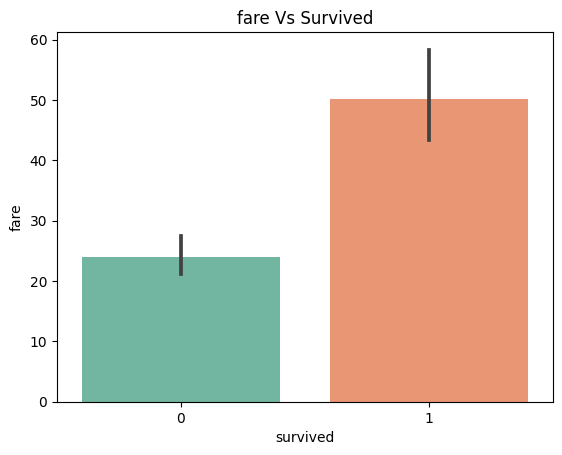

In [ ]:
sns.barplot(x='survived',y='fare',palette='Set2',data=df)
plt.title('fare Vs Survived')
# higher the fare, higher the chances of survival

Text(0.5, 1.0, 'Age Vs Survived')

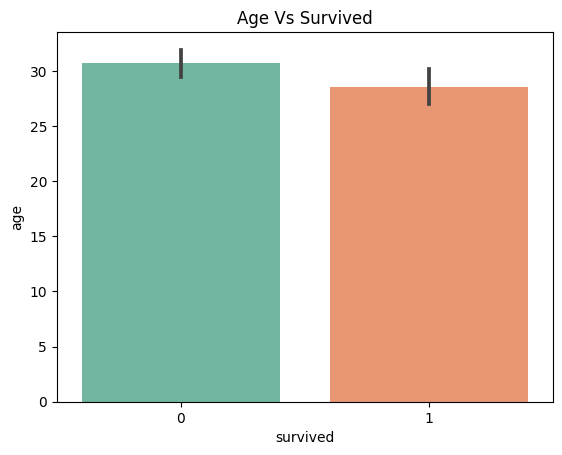

In [ ]:
sns.barplot(x='survived',y='age',palette='Set2',data=df)
plt.title('Age Vs Survived')
# people whom age is less than 27 are survived

Text(0.5, 1.0, 'Age Vs Fare')

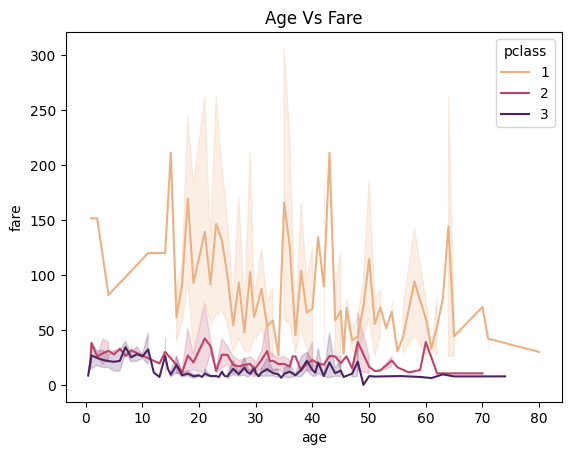

In [ ]:
sns.lineplot(x='age',y='fare',hue='pclass',data=df,palette='flare')
plt.title('Age Vs Fare')
# It is clear that people with class1 have more fare.